In [1]:
 # To mount Google Drive
from google.colab import drive

# Mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

import re

df = pd.read_csv('/content/drive/My Drive/FYP/FYP Y4S1/review_activity/interim/ocsvm_results.csv')
df['fake_reviews'] = df['fake_reviews'].fillna(0)
print("Size of dataset: {}".format(len(df)))

Size of dataset: 77268


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



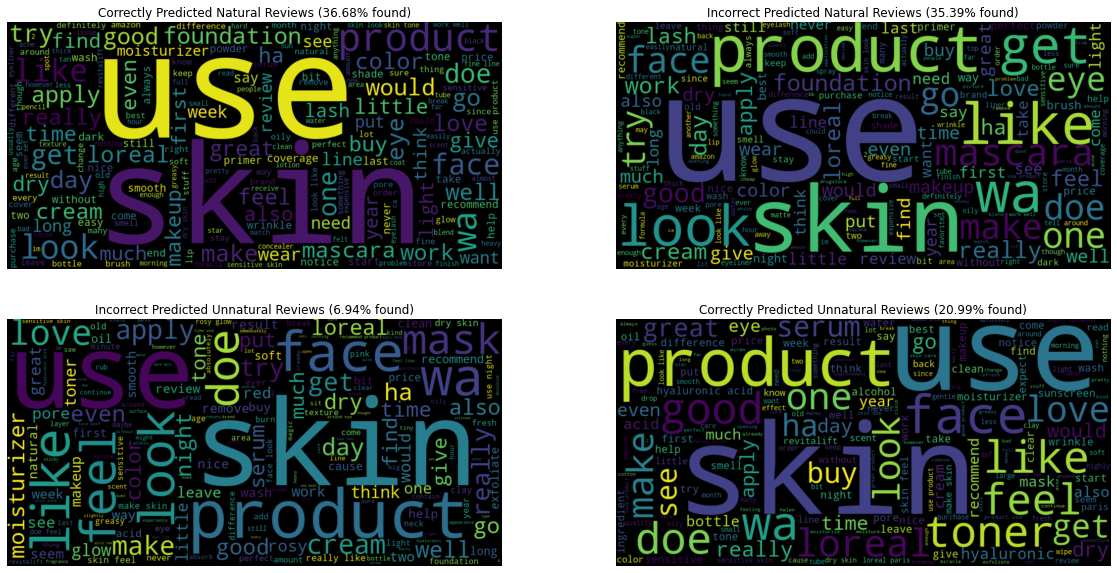

In [3]:
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.util import ngrams
from wordcloud import WordCloud

from collections import Counter

def generate_wordcloud(text):
    text = [nltk.word_tokenize(sentence) for sentence in text]

    words = []
    for sentence in text:
        for i in range(1,3):
            grams = ngrams(sentence, i)

            for gram in grams:
                words.append(' '.join(gram))
                
    counter = Counter()
    counter.update(words)
    
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dict(counter))
    return wordcloud

filtered_df = df[df['manual_label'].notnull()]
fig, axs = plt.subplots(2, 2, figsize=(20,10))

print()

for manual_label in [0,1]:
    for fake_review in [0,1]:
        current_df = filtered_df[(filtered_df['manual_label'] == manual_label) & (filtered_df['fake_reviews'] == fake_review)]
        current_wordcloud = generate_wordcloud(current_df['cleaned_reviews_text'])
        axs[manual_label, fake_review].imshow(current_wordcloud, interpolation='bilinear')
        axs[manual_label, fake_review].axis("off")
        df_percentage = round(len(current_df)/len(filtered_df) * 100,2)
        if manual_label == 0 and fake_review == 0:
            axs[manual_label, fake_review].set_title('Correctly Predicted Natural Reviews ({}% found)'.format(df_percentage))
        elif manual_label == 0 and fake_review == 1:
            axs[manual_label, fake_review].set_title('Incorrect Predicted Natural Reviews ({}% found)'.format(df_percentage))
        elif manual_label == 1 and fake_review == 0:
            axs[manual_label, fake_review].set_title('Incorrect Predicted Unnatural Reviews ({}% found)'.format(df_percentage))
        elif manual_label == 1 and fake_review == 1:
            axs[manual_label, fake_review].set_title('Correctly Predicted Unnatural Reviews ({}% found)'.format(df_percentage))

fig.show()